## Model Training

In [11]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [12]:
df=pd.read_csv('data/stud.csv')

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Prepearing X and Y features

In [14]:
X = df.drop(columns=['math_score'],axis=1)

In [15]:
y = df['math_score']

In [16]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])


In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square


In [22]:
models = {
    "Linear Regression":LinearRegression(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random ForestRegressor":RandomForestRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("\nModel performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('-' * 35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3257
- Mean Absolute Error: 4.2695
- R2 Score: 0.8742

Model performance for Test set
- Root Mean Squared Error: 5.4212
- Mean Absolute Error: 4.2347
- R2 Score: 0.8792
-----------------------------------


Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997

Model performance for Test set
- Root Mean Squared Error: 7.9737
- Mean Absolute Error: 6.2600
- R2 Score: 0.7387
-----------------------------------


Random ForestRegressor
Model performance for Training set
- Root Mean Squared Error: 2.3338
- Mean Absolute Error: 1.8365
- R2 Score: 0.9758

Model performance for Test set
- Root Mean Squared Error: 6.0018
- Mean Absolute Error: 4.6407
- R2 Score: 0.8520
-----------------------------------


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
-

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2 Score']).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
5,Ridge,0.880593
0,Linear Regression,0.879226
8,AdaBoostRegressor,0.852373
2,Random ForestRegressor,0.851970
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
4,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
1,Decision Tree Regressor,0.738718


## Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 87.92


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

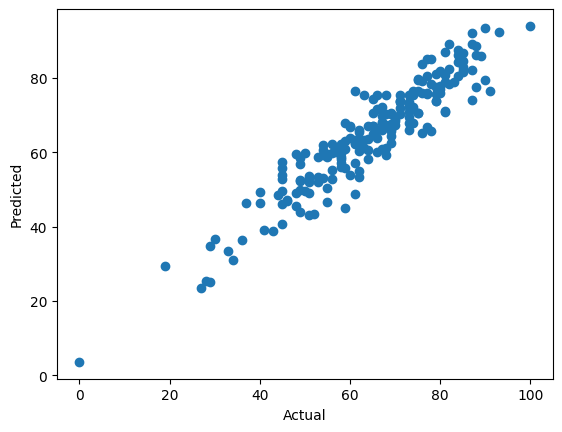

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

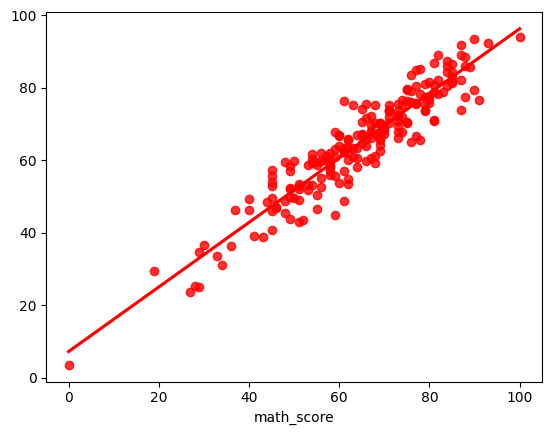

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

# Difference between actual and predicted values

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
